In [157]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

Load data

In [123]:
data = pd.read_csv("heart.csv")

In [124]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [126]:
for column in data.columns:
    print(np.unique(data[f'{column}']))

[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]
['F' 'M']
['ASY' 'ATA' 'NAP' 'TA']
[  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 155 156
 158 160 164 165 170 172 174 178 180 185 190 192 200]
[  0  85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153
 156 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 27

Label encoder

In [127]:
le = LabelEncoder()

In [128]:
data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Remove outlines

In [129]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [130]:
z_score = np.abs(stats.zscore(data))
z_score

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1.433140,0.515952,0.229032,0.410909,0.825070,0.551341,0.017255,1.382928,0.823556,0.832432,1.052114,1.113115
1,0.478484,1.938163,1.275059,1.491752,0.171961,0.551341,0.017255,0.754157,0.823556,0.105664,0.596078,0.898380
2,1.751359,0.515952,0.229032,0.129513,0.770188,0.551341,1.601219,1.525138,0.823556,0.832432,1.052114,1.113115
3,0.584556,1.938163,0.816995,0.302825,0.139040,0.551341,0.017255,1.132156,1.214246,0.574711,0.596078,0.898380
4,0.051881,0.515952,1.275059,0.951331,0.034755,0.551341,0.017255,0.581981,0.823556,0.832432,1.052114,1.113115
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.902775,0.515952,2.321086,1.210356,0.596393,0.551341,0.017255,0.188999,0.823556,0.293283,0.596078,0.898380
914,1.536902,0.515952,0.816995,0.627078,0.053049,1.813758,0.017255,0.164684,0.823556,2.357094,0.596078,0.898380
915,0.370100,0.515952,0.816995,0.129513,0.620168,0.551341,0.017255,0.857069,1.214246,0.293283,0.596078,0.898380
916,0.370100,1.938163,0.229032,0.129513,0.340275,0.551341,1.566710,1.461525,0.823556,0.832432,0.596078,0.898380


In [131]:
data = data[(z_score < 3).all(axis=1)]
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [132]:
data.shape

(899, 12)

Split data

In [133]:
X = data.drop(columns='HeartDisease')
y = data['HeartDisease']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Standardization 

In [148]:
standard_scaler = StandardScaler()

standard_X_train = standard_scaler.fit_transform(X_train)
standard_X_test = standard_scaler.transform(X_test)

KNN model

In [153]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(standard_X_train, y_train)
pred = knn.predict(standard_X_test)

In [154]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.83      0.82      0.82       125

    accuracy                           0.80       225
   macro avg       0.80      0.80      0.80       225
weighted avg       0.80      0.80      0.80       225


SVC model

In [155]:
svc = SVC(kernel='linear')
svc.fit(standard_X_train, y_train)
pred = svc.predict(standard_X_test)

In [156]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       100
           1       0.87      0.86      0.87       125

    accuracy                           0.85       225
   macro avg       0.85      0.85      0.85       225
weighted avg       0.85      0.85      0.85       225


PCA

In [174]:
pca = PCA(0.95)

In [175]:
principal_components_train_X = pca.fit_transform(standard_X_train)
principal_components_test_X = pca.fit_transform(standard_X_test)

In [176]:
pca.explained_variance_ratio_

array([0.2533519 , 0.1214833 , 0.11127723, 0.09315574, 0.08537915,
       0.07612331, 0.07243931, 0.05476125, 0.05262244, 0.0453711 ])

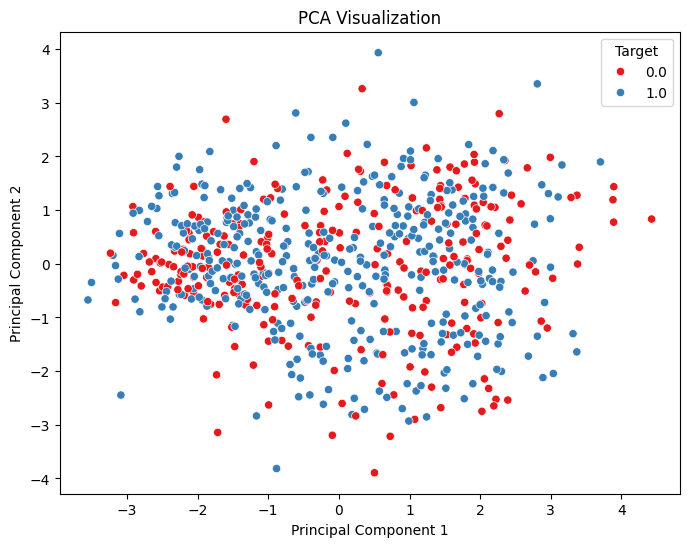

In [178]:
principal_df = pd.DataFrame(data=principal_components_train_X, columns=[f'PC{i}' for i in range(1, 11)])
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['HeartDisease'])], axis=1)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=final_df, palette='Set1')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='upper right')
plt.show()

KNN model with PCA

In [179]:
knn = KNeighborsClassifier(n_neighbors=3)

In [180]:
knn.fit(principal_components_train_X, y_train)

KNeighborsClassifier(n_neighbors=3)

In [181]:
pred = knn.predict(principal_components_test_X)

In [182]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       100
           1       0.83      0.76      0.79       125

    accuracy                           0.78       225
   macro avg       0.78      0.78      0.78       225
weighted avg       0.78      0.78      0.78       225


SVC model with PCA

In [183]:
svc = SVC(kernel='linear')
svc.fit(principal_components_train_X, y_train)
pred = svc.predict(principal_components_test_X)

In [184]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.83      0.82      0.82       125

    accuracy                           0.80       225
   macro avg       0.80      0.80      0.80       225
weighted avg       0.80      0.80      0.80       225
